<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/Jobs_posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

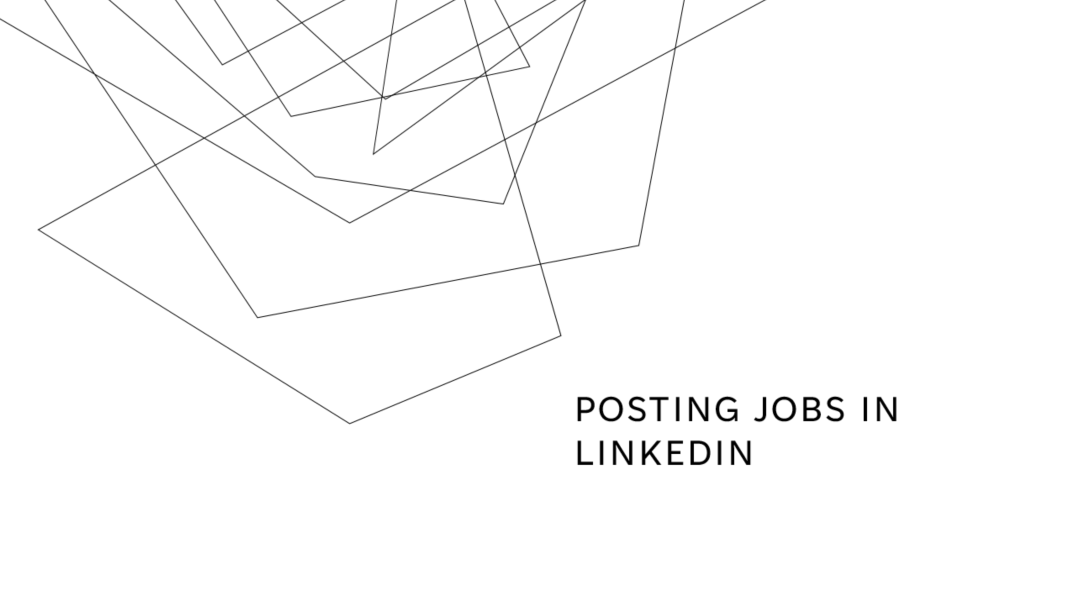

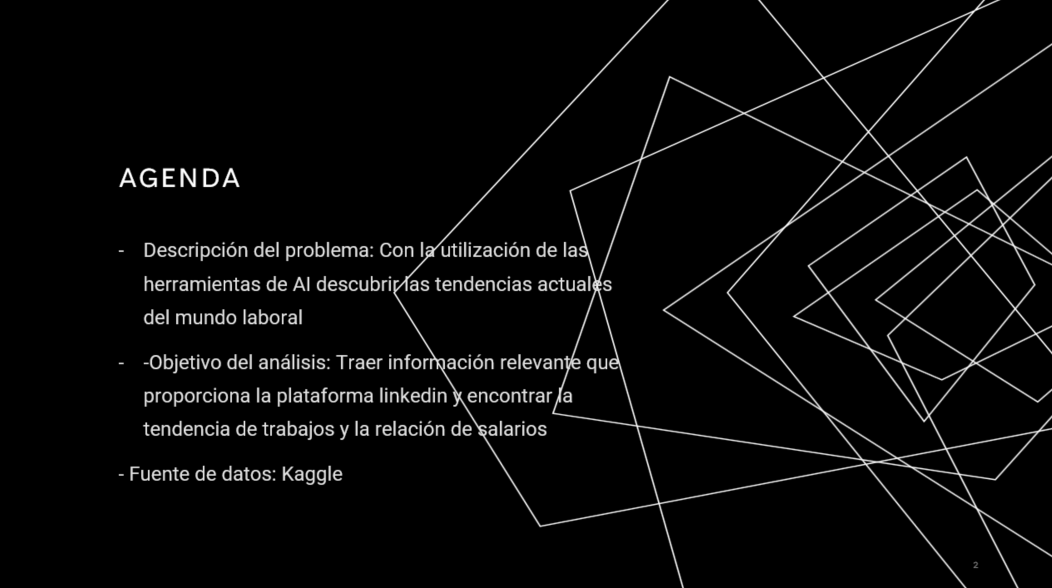

https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

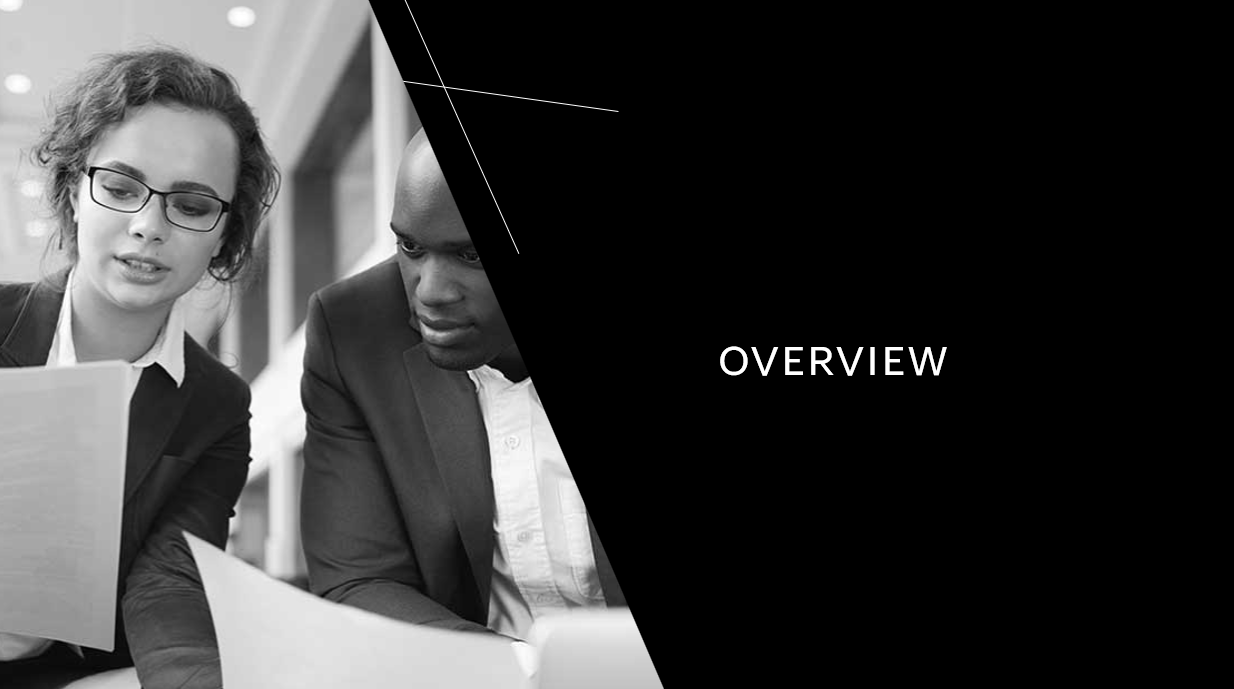

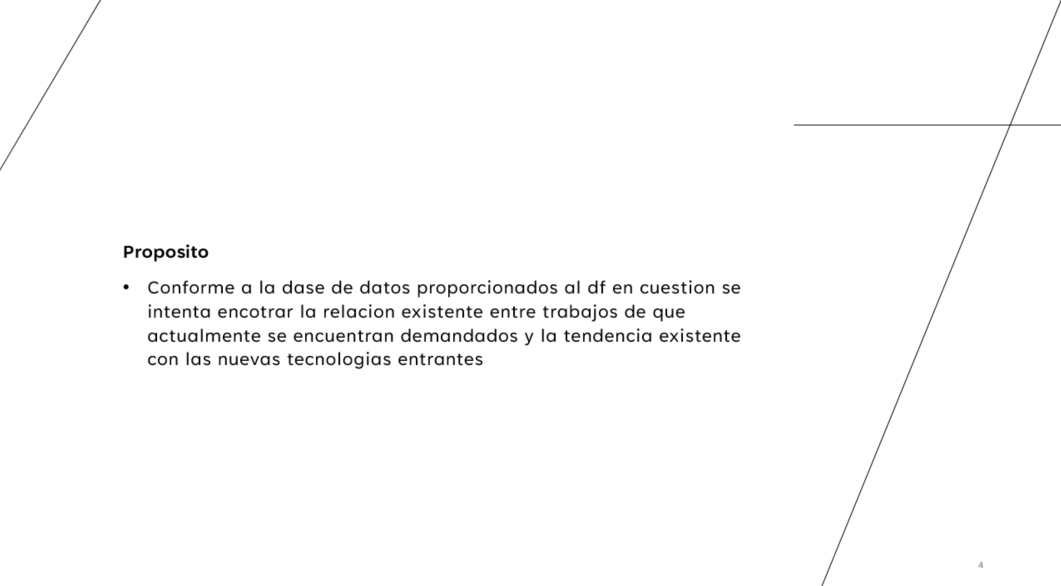

In [ ]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ClassFiles/datesets/postings.csv')

In [ ]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713400e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712860e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713280e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712900e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713450e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [ ]:
print(f'Hay {df.shape[0]} filas')
print(f'Hay {df.shape[1]} columnas')

Hay 123849 filas
Hay 31 columnas


#**3.Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos
## - Cantidad de Valores nulos
##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

In [ ]:
print("Tipos de datos:")
print(df.dtypes)

Tipos de datos:
job_id                          int64
company_name                   object
title                          object
description                    object
max_salary                    float64
pay_period                     object
location                       object
company_id                    float64
views                         float64
med_salary                    float64
min_salary                    float64
formatted_work_type            object
applies                       float64
original_listed_time          float64
remote_allowed                float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      obj

In [ ]:
print("\nValores nulos por columna:")
print(df.isna().sum())


Valores nulos por columna:
job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency  

# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD
## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas


In [ ]:
datos_descriptivos = df[["max_salary", "med_salary", "min_salary"]].describe()
print(datos_descriptivos)

         max_salary     med_salary    min_salary
count  2.979300e+04    6280.000000  2.979300e+04
mean   9.193942e+04   22015.619876  6.491085e+04
std    7.011101e+05   52255.873846  4.959738e+05
min    1.000000e+00       0.000000  1.000000e+00
25%    4.828000e+01      18.940000  3.700000e+01
50%    8.000000e+04      25.500000  6.000000e+04
75%    1.400000e+05    2510.500000  1.000000e+05
max    1.200000e+08  750000.000000  8.500000e+07


# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

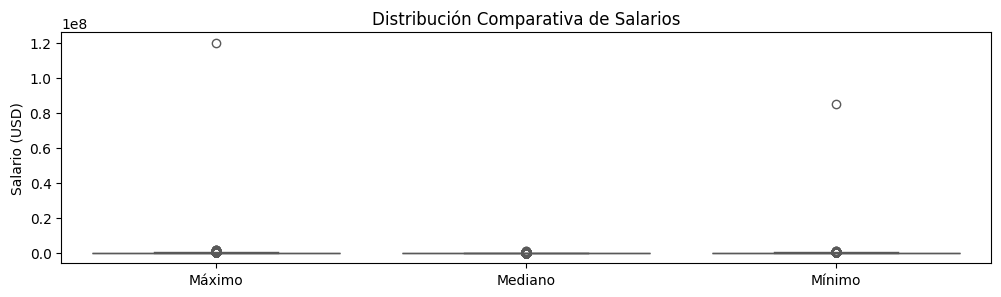

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df[["max_salary", "med_salary", "min_salary"]], palette="Set2")
plt.title("Distribución Comparativa de Salarios")
plt.ylabel("Salario (USD)")
plt.xticks(ticks=[0, 1, 2], labels=["Máximo", "Mediano", "Mínimo"])
plt.show()

In [ ]:
df['max_salary'] = df['max_salary'].fillna(df['max_salary'].mean())
df['med_salary'] = df['med_salary'].fillna(df['med_salary'].mean())
df['min_salary'] = df['min_salary'].fillna(df['min_salary'].mean())

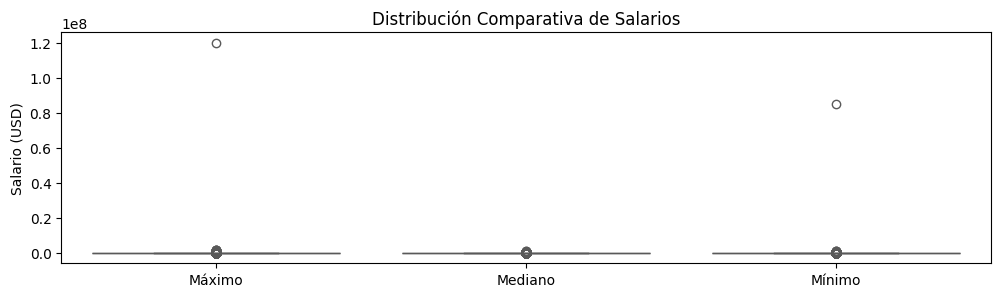

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df[["max_salary", "med_salary", "min_salary"]], palette="Set2")
plt.title("Distribución Comparativa de Salarios")
plt.ylabel("Salario (USD)")
plt.xticks(ticks=[0, 1, 2], labels=["Máximo", "Mediano", "Mínimo"])
plt.show()

6. Análisis Predictivo
- Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código
- Modelado Predictivo
- Modelo elegido y parámetros
- Entrenamiento y Evaluación
- Resultados

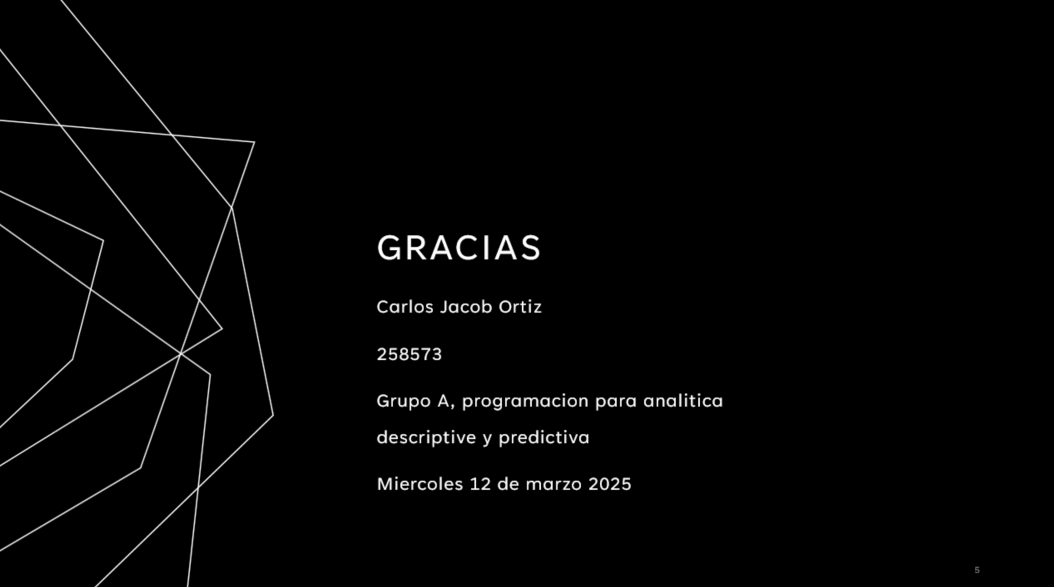